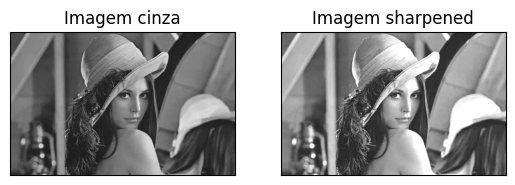

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

# Carrega a imagem em escala de cinza
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (3, 3), 0)

edges = cv2.subtract(img, blur)

sharpened = cv2.addWeighted(img, 1.5, edges, -0.5, 0)


# Mostra as imagens cinza e desfoque gaussiano
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened, cmap='gray')
plt.title('Imagem sharpened'), plt.xticks([]), plt.yticks([])
plt.show()




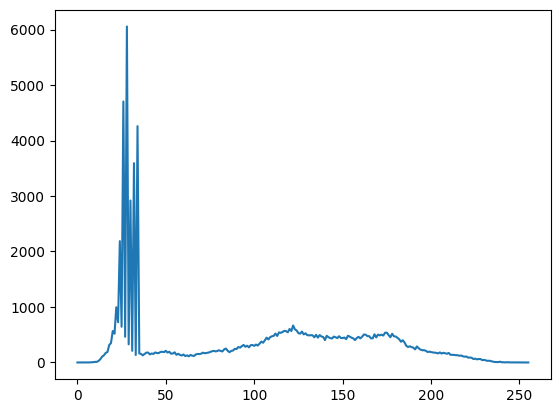

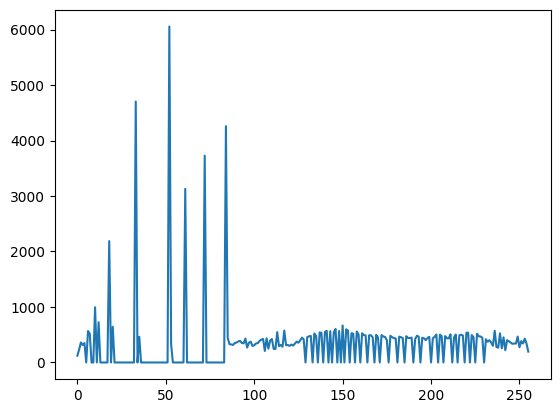

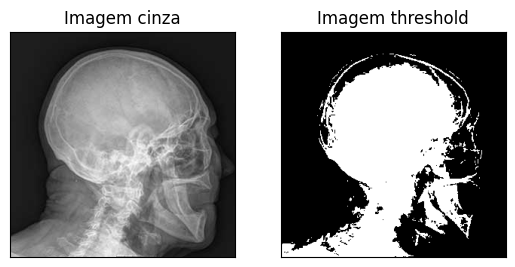

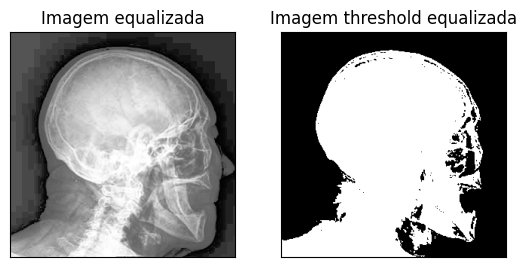

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

# Carrega a imagem em escala de cinza
img = cv2.imread('cranio.jpg', cv2.IMREAD_GRAYSCALE)

# Equaliza o histograma da imagem
equalized_img = cv2.equalizeHist(img)

# Calcula o histograma da imagem
hist = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

# Divide o histograma em duas partes
half_hist = int(len(hist) / 2)
hist1 = hist[:half_hist]
hist2 = hist[half_hist:]

# Encontra os picos em cada parte do histograma
idx_peak1 = np.argmax(hist1)
idx_peak2 = np.argmax(hist2) + half_hist

# Aplica a média entre os picos encontrados
mean_peak = int((idx_peak1 + idx_peak2) / 2)

# Plotar o histograma normal
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
plt.plot(hist)
plt.show()

# Plotar o histograma equalizado
hist, bins = np.histogram(equalized_img.ravel(), 256, [0, 256])
plt.plot(hist)
plt.show()

ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Mostra as imagens original e threshold
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh_img, cmap='gray')
plt.title('Imagem threshold'), plt.xticks([]), plt.yticks([])
plt.show()


ret, thresh_img = cv2.threshold(img, mean_peak, 255, cv2.THRESH_BINARY)

# Mostra as imagens original e threshold
plt.subplot(121), plt.imshow(equalized_img, cmap='gray')
plt.title('Imagem equalizada'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh_img, cmap='gray')
plt.title('Imagem threshold equalizada'), plt.xticks([]), plt.yticks([])
plt.show()